In [1]:
%run imports.ipynb

In [23]:
stability_scores = pd.read_csv('source_data/stability_scores.csv')

In [32]:
stability_scores[stability_scores.aa_position == 770]

,aa_position,stability_ratio_normalized_to_WT
185,770,0.418915


In [20]:
cosmic = pd.read_csv('source_data/DNMT3A_COSMIC_hematopoietic_and_lymphoid_tissue_Mon Nov 14 09_21_53 2022.csv')
cosmic = cosmic[cosmic.Type.str.contains('Substitution')]
cosmic = cosmic.groupby('Position').agg({'Count': 'sum'}).reset_index().sort_values('Count', ascending=False)

# Get DNMT3A amino acid sequence.
out = !curl -s https://rest.uniprot.org/uniprotkb/Q9Y6K1.fasta
seq = ''.join(out[1:])

cosmic['Position'] = cosmic.Position.astype(int)
cosmic['AA'] = cosmic.Position.map(lambda x: seq[x-1])

In [62]:
target_positions = [714, 729, 736, 749, 770, 771]

In [60]:
cosmic[cosmic.Count >= 3]

,Position,Count,AA
295,882,1748,R
222,736,51,R
115,543,38,G
204,714,32,S
154,635,29,R
...,...,...,...
34,306,3,W
281,859,3,L
259,816,3,Q
57,366,3,R


In [61]:
cosmic[cosmic.Position == 777]

,Position,Count,AA
241,777,2,P


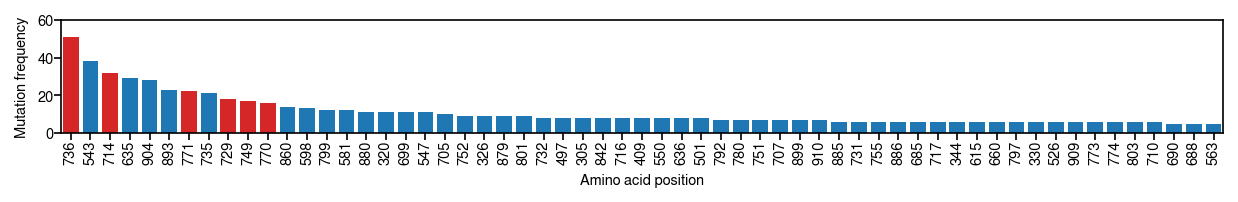

In [69]:
N = 60

fig = plt.figure(figsize=(10, 1))
ax = fig.add_subplot(111)

d = cosmic.head(N).tail(N-1)

for i, r in enumerate(d.to_records()):
    ax.bar(i, r.Count, fc='C0' if r.Position not in target_positions else 'C3')
    
ax.set_xticks(range(N-1))
ax.set_xticklabels(d.Position, rotation=90)

ax.set_xlim(0-0.5, N-1-0.5)
ax.set_ylim(0, 60)
ax.tick_params(pad=0)

ax.set_xlabel('Amino acid position')
ax.set_ylabel('Mutation frequency')

save_figures('source_data_figures/synergistic_residues_mutation_frequency_cosmic')